# Benford's Law on the World GDP dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2.csv", skiprows=4)

In [5]:
# Keep only columns that look like years (digits only)
year_cols = [c for c in df.columns if c.isdigit()]

df_long = df.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="GDP"
)

df_long["Year"] = df_long["Year"].astype(int)

In [6]:
# Remove nulls
df_clean = df_long.dropna(subset=["GDP"])

# Remove zeros and negatives
df_clean = df_clean[df_clean["GDP"] > 0]

# Optional: remove extremely small values
df_clean = df_clean[df_clean["GDP"] >= 1]

In [7]:
total_values = len(df_long)
usable_values = len(df_clean)

print(f"Total rows: {total_values:,}")
print(f"Usable values for Benford: {usable_values:,}")

Total rows: 17,290
Usable values for Benford: 14,561


In [8]:
def first_digit(x):
    return int(str(int(x))[0])

df_clean["FirstDigit"] = df_clean["GDP"].apply(first_digit)

In [9]:
observed = (
    df_clean["FirstDigit"]
    .value_counts(normalize=True)
    .sort_index()
)

In [10]:
digits = np.arange(1, 10)
benford = np.log10(1 + 1 / digits)

benford = pd.Series(benford, index=digits)

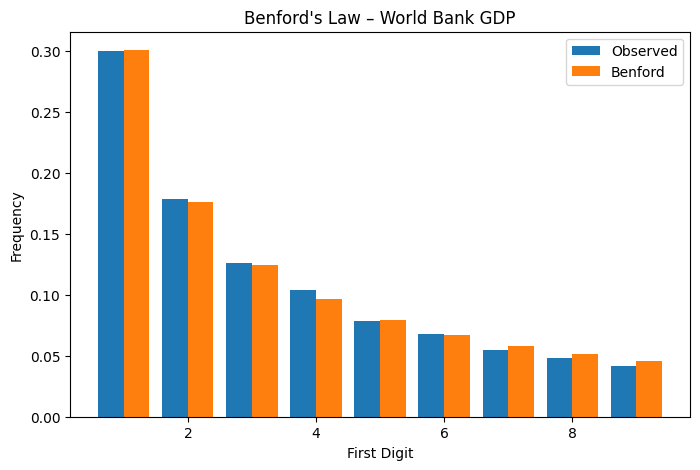

In [11]:
plt.figure(figsize=(8, 5))

plt.bar(digits - 0.2, observed, width=0.4, label="Observed")
plt.bar(digits + 0.2, benford, width=0.4, label="Benford")

plt.xlabel("First Digit")
plt.ylabel("Frequency")
plt.title("Benford's Law – World Bank GDP")
plt.legend()
plt.show()

In [12]:
mad = np.mean(np.abs(observed - benford))
print(f"MAD: {mad:.4f}")

MAD: 0.0024
